VAMOS A ANALIZAR LA BASE DE DATOS DE CANCER DE SENO QUE ES UN PROBLEMA DE CLASIFICACION: BENIGNO- MALIGNO

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar dataset
data = load_breast_cancer()

# Convertir a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Agregar la columna de clases (0 = maligno, 1 = benigno)

# Mostrar las primeras filas
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
#VAMOS CON LA ESTADISTICA DESCRIPTIVA

In [7]:
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())


Shape: (569, 31)
Columnas: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


In [9]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [11]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

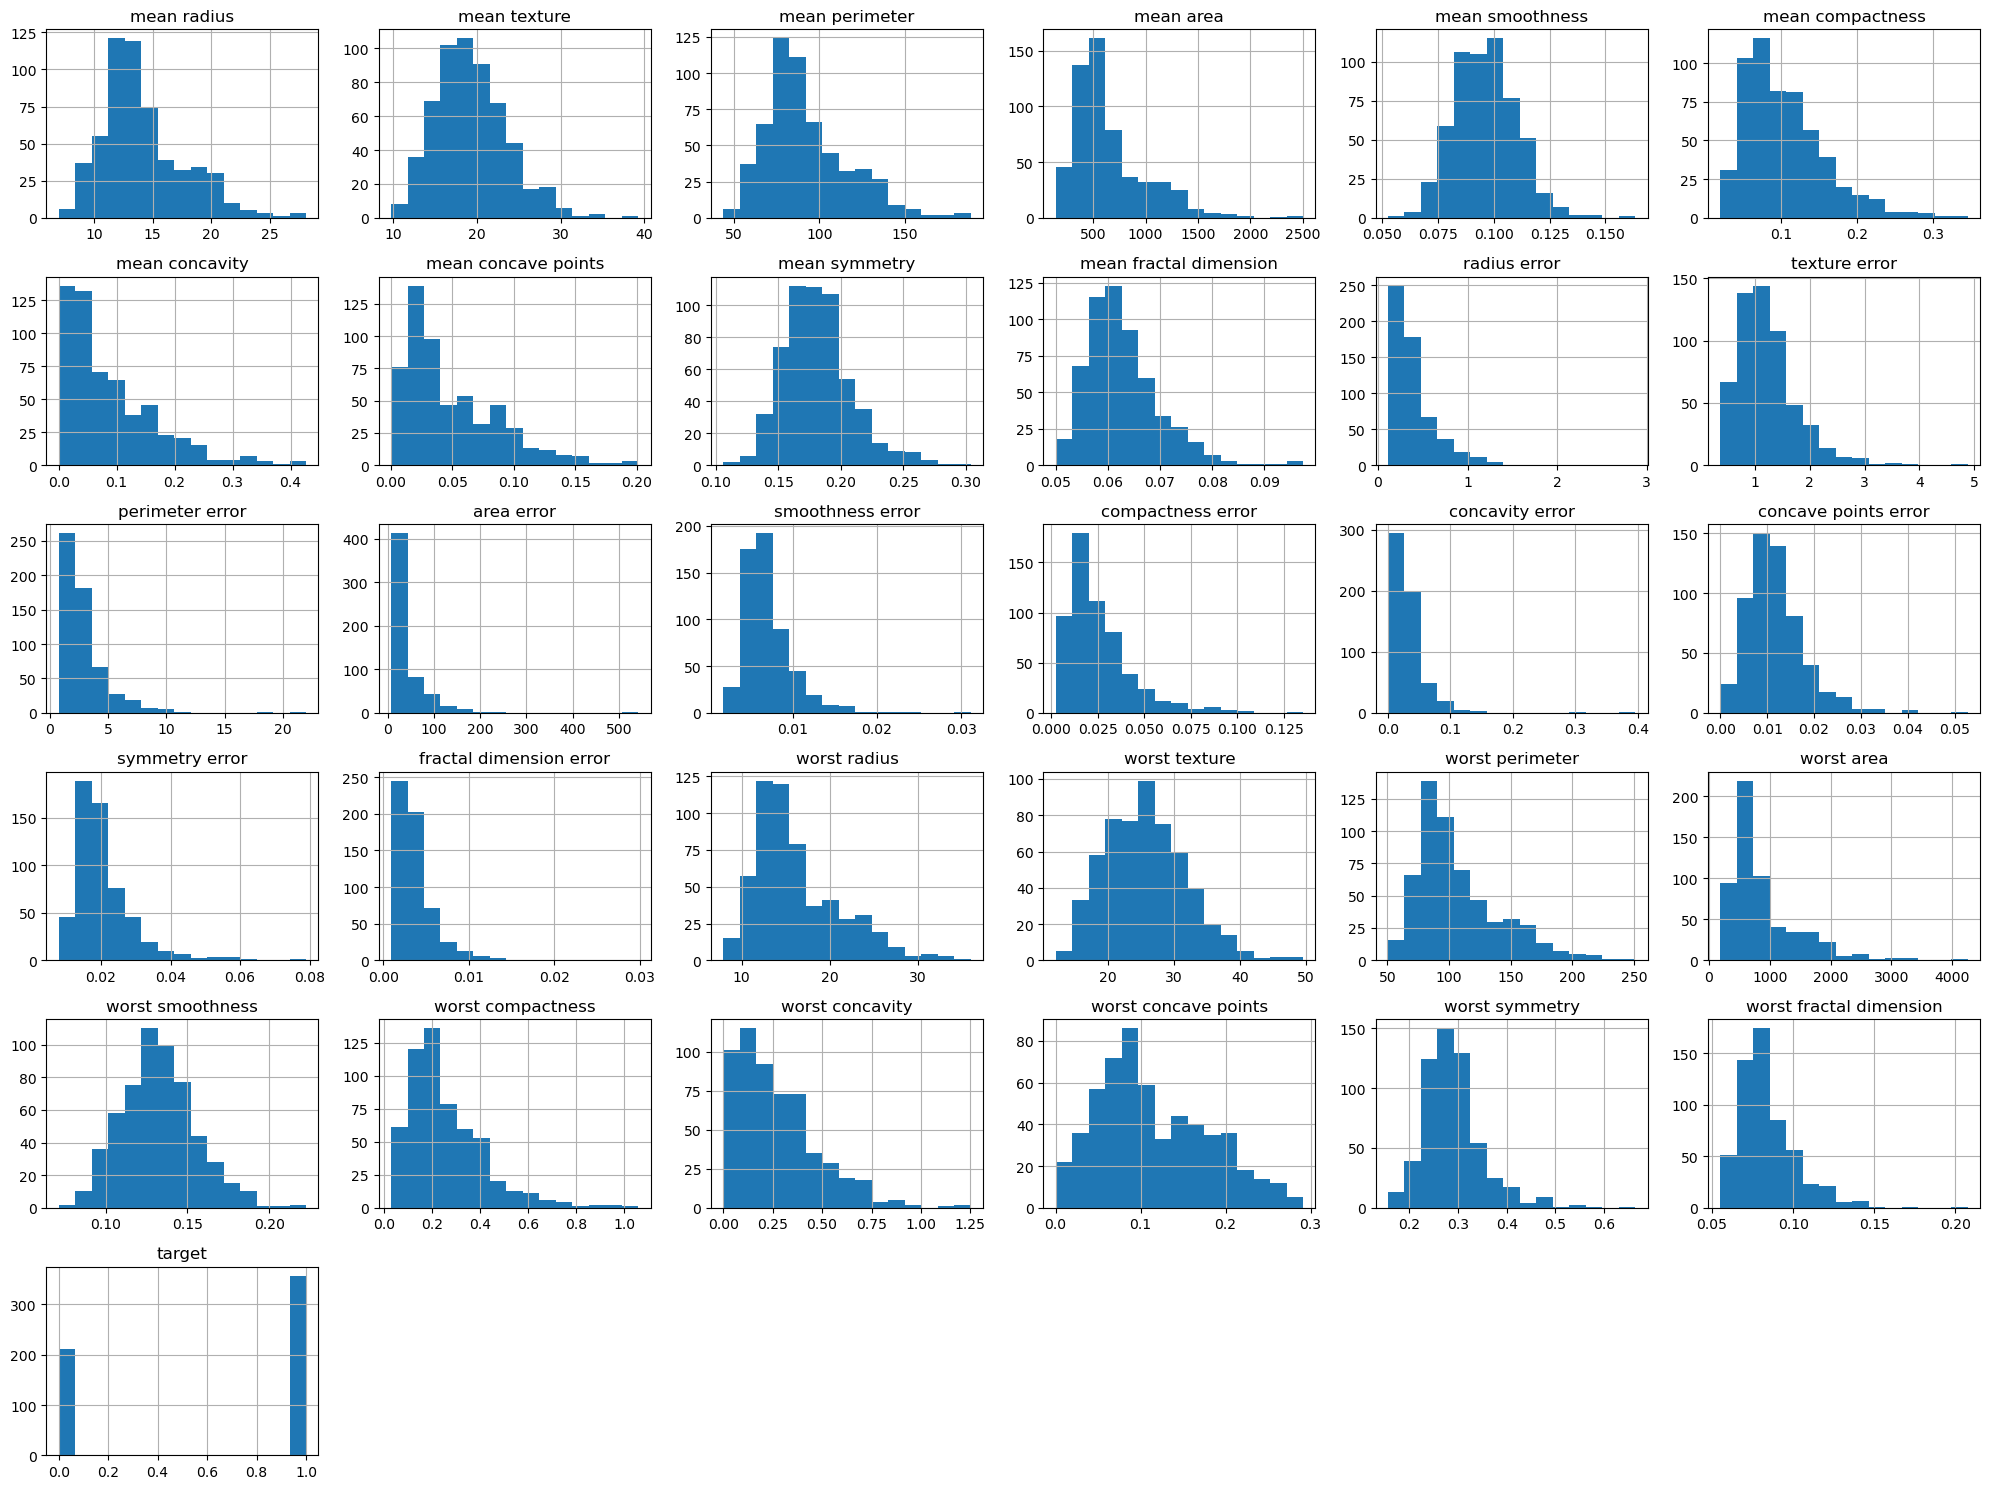

In [13]:
import matplotlib.pyplot as plt
df.hist(bins=15, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [15]:
# COMO SON MUCHAS VARIABLES, VAMOS CON UNA MATRIZ DE CORRELACION PARA VER SI HAY DATOS CLAVE

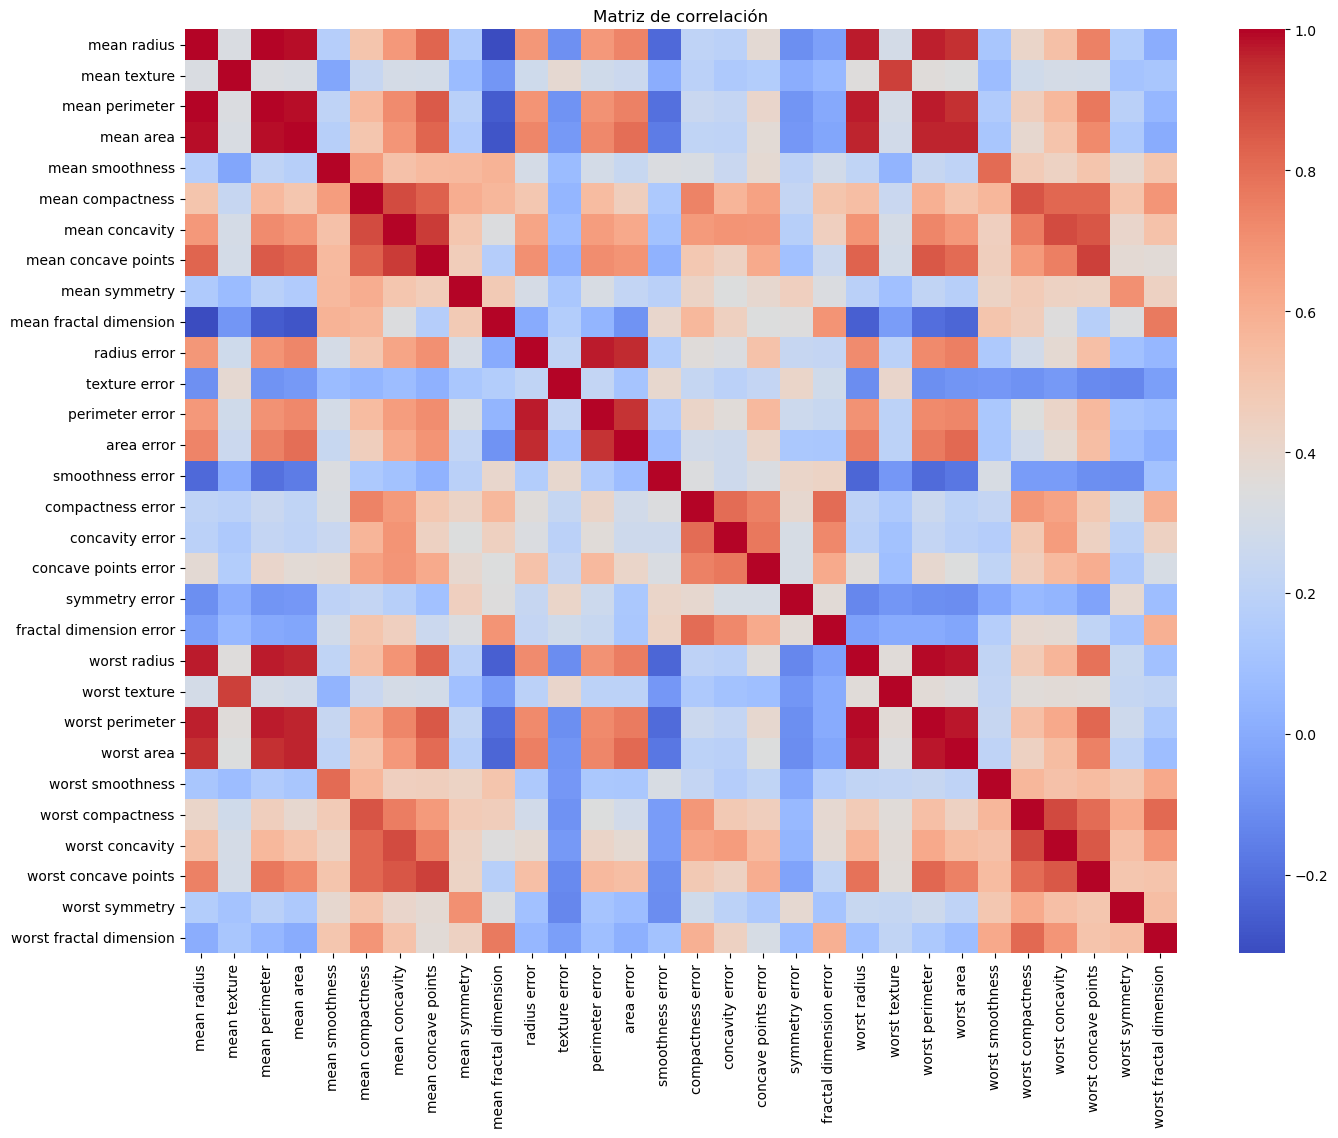

In [17]:
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(df.drop(columns='target').corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación")
plt.show()

In [19]:
# CUIDADO! LA MATRIZ DE CORRELACION USA EL COEFICIENTE DE PEARSON QUE ASUME NORMALIDAD
#ENTONCES ESTA BIEN COMO UN PRIMER PANTALLAZO PERO NO SE SI MIS DATOS SON NORMALES
#PODRIA USAR COMO ALTERNATIVA LA MATRIZ DE SPEARMAN QUE NO ASUME NORMALIDAD

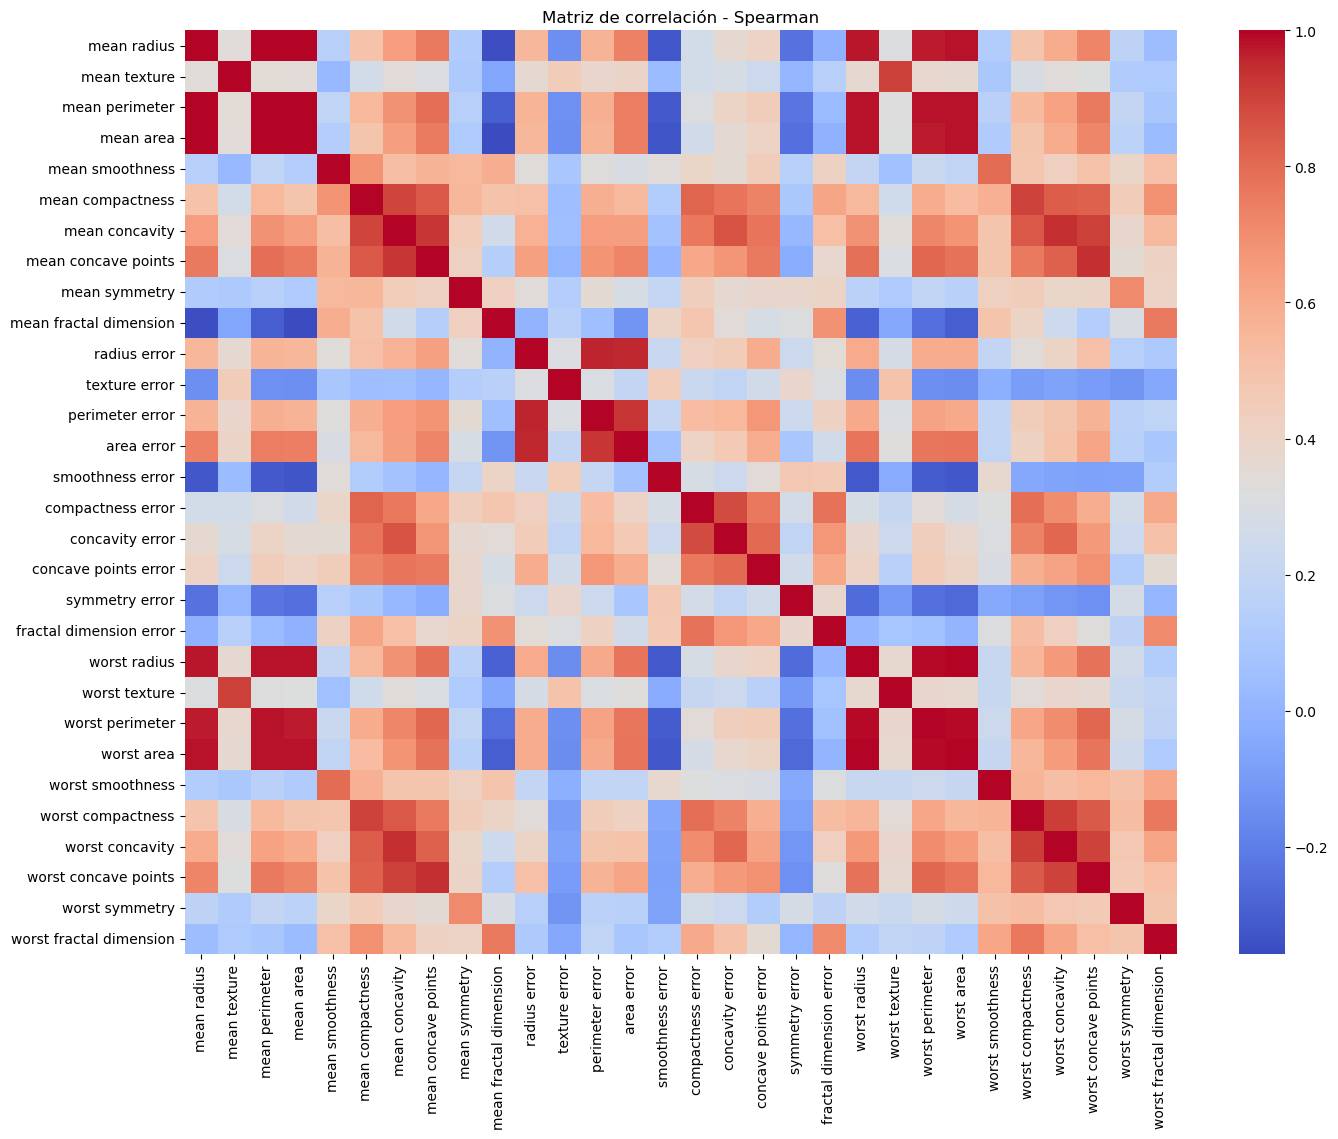

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación de Spearman
spearman_corr = df.drop(columns='target').corr(method='spearman')

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=False)
plt.title("Matriz de correlación - Spearman")
plt.show()


INTERPRETACION, COMO SON MUUUUY SIMILARES LAS 2, MUY POSIBLEMENTE LOS DATOS SEAN NORMALES. 
AHORA VAMOS A SELECCIONAR UN SUBCONJUNTO QUE SEA REPRESENTATIVO: EN BASE A QUE?

Baja multicolinealidad: evito variables que están fuertemente correlacionadas entre sí (redundantes).

Representatividad: cubro distintos aspectos morfológicos (tamaño, forma, textura).

Importancia conocida: hay estudios donde se destacan ciertas variables como muy informativas para distinguir tumores benignos y malignos.

In [27]:
subset = [
    'mean radius',          # Tamaño general
    'mean texture',         # Variabilidad del patrón
    'mean symmetry',        # Simetría (asociado a malignidad)
    'worst area',           # Tamaño máximo observado
    'worst smoothness',     # Regularidad de contorno (valores altos = más malignos)
    'mean concave points'   # Profundidad de concavidades (alto = más agresivo)
]


In [29]:
# VOY A APLICAR PRUEBA DE NORMALIDAD A ESTAS VARIABLES: USO SHAPIRO

In [31]:
from scipy.stats import shapiro

# Subset de columnas
subset = [
    'mean radius',
    'mean texture',
    'mean symmetry',
    'worst area',
    'worst smoothness',
    'mean concave points'
]

# Evaluar normalidad para cada variable
for col in subset:
    stat, p = shapiro(df[col])
    print(f"{col}: W={stat:.4f}, p-value={p:.4f} -> {'Normal' if p > 0.05 else 'No normal'}")


mean radius: W=0.9411, p-value=0.0000 -> No normal
mean texture: W=0.9767, p-value=0.0000 -> No normal
mean symmetry: W=0.9726, p-value=0.0000 -> No normal
worst area: W=0.8161, p-value=0.0000 -> No normal
worst smoothness: W=0.9886, p-value=0.0002 -> No normal
mean concave points: W=0.8917, p-value=0.0000 -> No normal


In [33]:
#interpretacion, ninguna variable se distribuye normalmente

In [35]:
#vamos con la prueba de homogenidad de varioazans con Levene para no parametricos

In [37]:
from scipy.stats import levene

# Separar datos por clase
grupo_0 = df[df['target'] == 0]  # Maligno
grupo_1 = df[df['target'] == 1]  # Benigno

# Evaluar homogeneidad de varianza
for col in subset:
    stat, p = levene(grupo_0[col], grupo_1[col])
    print(f"{col}: Levene stat={stat:.4f}, p-value={p:.4f} -> {'Igual varianza' if p > 0.05 else 'Varianzas diferentes'}")


mean radius: Levene stat=90.4771, p-value=0.0000 -> Varianzas diferentes
mean texture: Levene stat=0.6840, p-value=0.4086 -> Igual varianza
mean symmetry: Levene stat=2.0360, p-value=0.1542 -> Igual varianza
worst area: Levene stat=196.8885, p-value=0.0000 -> Varianzas diferentes
worst smoothness: Levene stat=0.5320, p-value=0.4661 -> Igual varianza
mean concave points: Levene stat=94.9059, p-value=0.0000 -> Varianzas diferentes


In [39]:
#interpretacion: no tengo homegenidad de varianzas en todos los grupos, hago Manney-Whitney U
#comparando Maligno es 0 benigno es 1

In [41]:
from scipy.stats import mannwhitneyu

# Prueba para cada variable del subset
for col in subset:
    stat, p = mannwhitneyu(grupo_0[col], grupo_1[col], alternative='two-sided')
    print(f"{col}: U={stat:.2f}, p-value={p:.4f} -> {'Diferencia significativa' if p < 0.05 else 'No significativa'}")


mean radius: U=70955.00, p-value=0.0000 -> Diferencia significativa
mean texture: U=58717.50, p-value=0.0000 -> Diferencia significativa
mean symmetry: U=52870.00, p-value=0.0000 -> Diferencia significativa
worst area: U=73400.50, p-value=0.0000 -> Diferencia significativa
worst smoothness: U=57070.00, p-value=0.0000 -> Diferencia significativa
mean concave points: U=72992.50, p-value=0.0000 -> Diferencia significativa


In [43]:
#interpretacion : todas podrian ser utiles como variables predicttivas en un modelo de clasificacion
#pasamos al ML con los modelos predictivos: preparar datgos, elegir modelos y evaluar desempeño

In [45]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y variable objetivo (y)
X = df[subset]
y = df['target']  # 0 = maligno, 1 = benigno

# Dividir en entrenamiento y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.956140350877193
Matriz de confusión:
[[39  3]
 [ 2 70]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC: 0.9955357142857142


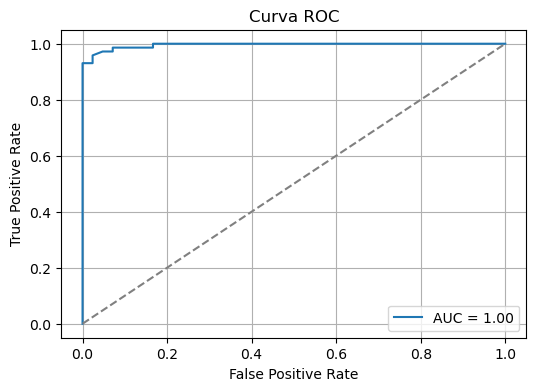

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicciones
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# ROC AUC
y_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()


In [51]:
#interpretacion: el modelo funciona muy bien, podemos ahora ver la importancia de las variables

              Variable  Importancia
3           worst area     0.336898
5  mean concave points     0.298714
0          mean radius     0.203059
4     worst smoothness     0.069775
1         mean texture     0.069463
2        mean symmetry     0.022091


/var/folders/9r/zxhk881s7f12r2v98zs7w6h40000gn/T/ipykernel_11290/705762237.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias, x='Importancia', y='Variable', palette='viridis')


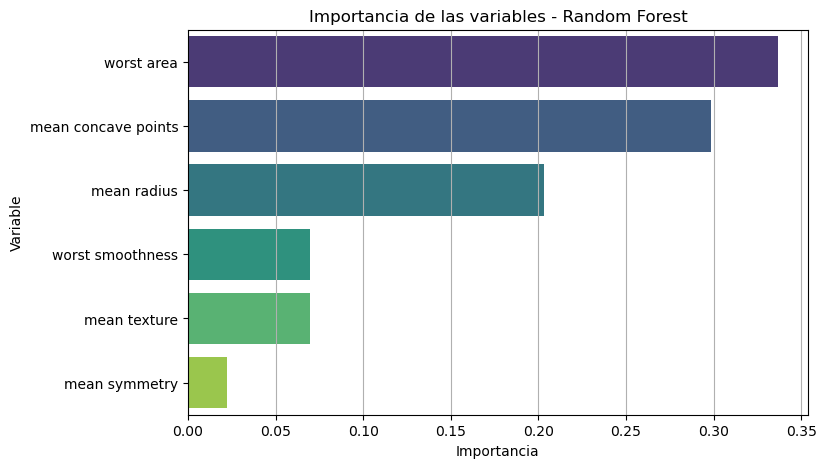

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con importancias
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': clf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar tabla
print(importancias)

# Plot de importancias
plt.figure(figsize=(8, 5))
sns.barplot(data=importancias, x='Importancia', y='Variable', palette='viridis')
plt.title("Importancia de las variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.grid(axis='x')
plt.show()


In [57]:
#interpretacion: las 3 primeras variables son las mas importantes
#podemos simplificar el modelos a solo estas 3 variables y volver a entrenar el modelos

In [59]:
# Nuevo subset de las 3 variables más importantes
top_vars = ['worst area', 'mean concave points', 'mean radius']
X_top = df[top_vars]

# Dividir en train/test
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

# Nuevo modelo
clf_top = RandomForestClassifier(random_state=42)
clf_top.fit(X_train_top, y_train)

# Evaluar
y_pred_top = clf_top.predict(X_test_top)
print("Accuracy con 3 variables:", accuracy_score(y_test, y_pred_top))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_top))


Accuracy con 3 variables: 0.9385964912280702
Matriz de confusión:
[[40  2]
 [ 5 67]]


interpretacion: el modelo con solo 3 variables baja un poco la precision, de 0.96 a 0.94
Ahora al evaluar la matriz de confusion
Modelo completo:

Verdaderos positivos (VP): 70
Falsos negativos (FN): 2
Falsos positivos (FP): 3
Verdaderos negativos (VN): 39

Modelo reducido:
VP: 67
FN: 5
FP: 2
VN: 40

Conclusión: El modelo reducido comete más falsos negativos, pero tiene menos falsos positivos, 
lo que podría ser preferible en algunos contextos, dependiendo de lo que se valore más

In [62]:
#vamos a comparar el desempeño de los 2 modelos

ROC AUC con 3 variables: 0.9910714285714286


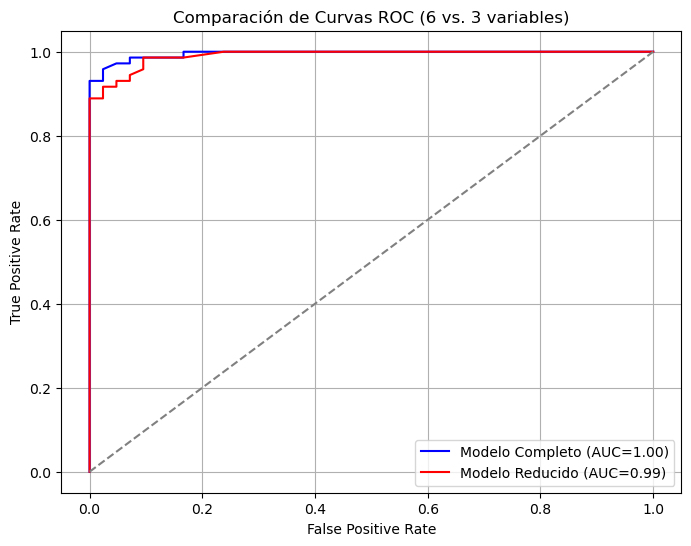

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular ROC AUC para el modelo reducido
y_proba_top = clf_top.predict_proba(X_test_top)[:, 1]
auc_top = roc_auc_score(y_test, y_proba_top)
print("ROC AUC con 3 variables:", auc_top)

# Curva ROC para el modelo reducido
fpr_top, tpr_top, _ = roc_curve(y_test, y_proba_top)

# Graficar comparación entre ambos modelos
plt.figure(figsize=(8, 6))

# Curva ROC del modelo completo
y_proba_full = clf.predict_proba(X_test)[:, 1]
fpr_full, tpr_full, _ = roc_curve(y_test, y_proba_full)
plt.plot(fpr_full, tpr_full, label=f"Modelo Completo (AUC={roc_auc_score(y_test, y_proba_full):.2f})", color='b')

# Curva ROC del modelo reducido
plt.plot(fpr_top, tpr_top, label=f"Modelo Reducido (AUC={auc_top:.2f})", color='r')

# Línea diagonal (sin discriminación)
plt.plot([0, 1], [0, 1], '--', color='gray')

# Ajustes finales
plt.title("Comparación de Curvas ROC (6 vs. 3 variables)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [66]:
#interpretacion: el modelo con 6 variables tiene casi el mismo desempeño, 0.955 contra 0.911
#antes de pasar a otro modelo vamos a hacer la validacion cruzada

In [68]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validación cruzada con el modelo reducido (3 variables)
scores = cross_val_score(clf_top, X_top, y, cv=10, scoring='accuracy')  # 10-fold cross validation

# Mostrar resultados
print(f"Scores de validación cruzada (Accuracy): {scores}")
print(f"Accuracy media: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")


Scores de validación cruzada (Accuracy): [0.92982456 0.80701754 0.89473684 0.92982456 0.98245614 0.94736842
 0.98245614 0.94736842 0.92982456 0.96428571]
Accuracy media: 0.9315
Desviación estándar: 0.0486


In [70]:
#interpretacion: La validación cruzada confirma que el modelo reducido con 3 variables es robusto y mantiene un excelente desempeño
#Aunque hay algunas fluctuaciones (debido a la partición de los datos), el modelo sigue siendo fiable.

In [72]:
#Vamos a probar otro modelo, el de regresion logistica a ver que tal su desempeño

Accuracy con Regresión Logística: 0.9298245614035088
Matriz de confusión:
[[37  5]
 [ 3 69]]
ROC AUC con Regresión Logística: 0.9735449735449736


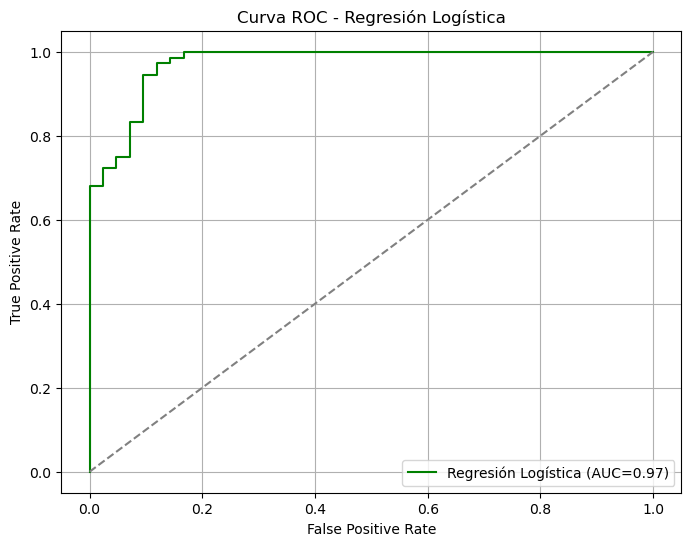

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear el modelo de regresión logística
logreg = LogisticRegression(random_state=42, max_iter=10000)

# Entrenar el modelo
logreg.fit(X_train_top, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_top)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy con Regresión Logística:", accuracy_logreg)

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logreg))

# ROC AUC
y_proba_logreg = logreg.predict_proba(X_test_top)[:, 1]
auc_logreg = roc_auc_score(y_test, y_proba_logreg)
print("ROC AUC con Regresión Logística:", auc_logreg)

# Curva ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Regresión Logística (AUC={auc_logreg:.2f})", color='g')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("Curva ROC - Regresión Logística")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [76]:
#interpretacion: Conclusión: Ambos modelos cometen errores similares, 
#pero Regresión Logística tiene más falsos negativos y más falsos positivos, aunque las diferencias son pequeñas.

In [78]:
#Regresion logistica es mas interpretable.
#vamos a hacer ajuste de hiperparametros a ver que sucede

In [80]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el clasificador de Random Forest
rf = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ejecutar el ajuste
grid_search.fit(X_train_top, y_train)

# Mostrar los mejores parámetros y el mejor desempeño
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor accuracy: {grid_search.best_score_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor accuracy: 0.9428571428571428


In [82]:
#interpretacion: hay una ligera mejora de la precision
#vamos a realizar algunos ajustes adicionales probando SVM

In [84]:
from sklearn.svm import SVC

# Definir los parámetros a buscar para SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Inicializar el clasificador SVM
svm = SVC(random_state=42)

# Configurar GridSearchCV para SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ejecutar el ajuste
grid_search_svm.fit(X_train_top, y_train)

# Mostrar los mejores parámetros y el mejor desempeño
print(f"Mejores parámetros para SVM: {grid_search_svm.best_params_}")
print(f"Mejor accuracy para SVM: {grid_search_svm.best_score_}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Mejor accuracy para SVM: 0.9274725274725275


In [86]:
#interpretacion: Random Forest sigue siendo ligeramente mejor

In [88]:
#vamos a graficar la curva ROC para SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
Mejor accuracy para SVM: 0.9274725274725275
AUC ROC para SVM: 0.9788359788359787


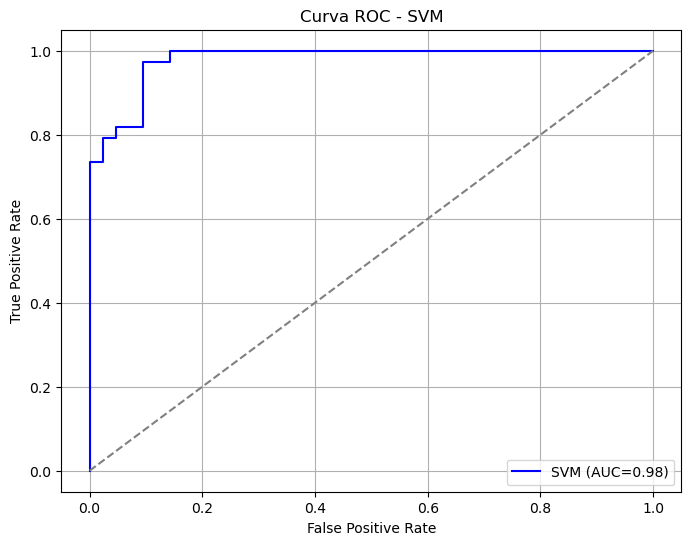

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a buscar para SVM con 'probability=True'
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'probability': [True]  # Habilitar la probabilidad
}

# Inicializar el clasificador SVM con 'probability=True'
svm = SVC(random_state=42)

# Configurar GridSearchCV para SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ejecutar el ajuste
grid_search_svm.fit(X_train_top, y_train)

# Mostrar los mejores parámetros y el mejor desempeño
print(f"Mejores parámetros para SVM: {grid_search_svm.best_params_}")
print(f"Mejor accuracy para SVM: {grid_search_svm.best_score_}")

# Ahora, podemos obtener las probabilidades y graficar la curva ROC como antes
y_proba_svm = grid_search_svm.predict_proba(X_test_top)[:, 1]

# Calcular el AUC ROC
from sklearn.metrics import roc_auc_score, roc_curve
auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"AUC ROC para SVM: {auc_svm}")

# Calcular la curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

# Graficar la curva ROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={auc_svm:.2f})", color='b')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("Curva ROC - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [94]:
#interpretacion: random forest sigue teniendo un ROC mejor, lo que indica una mejor capacidad de discriminar entre clases

In [96]:
#ahora voy a evaluar SVM en el conjunto de test

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar las predicciones en el conjunto de test
y_pred_svm = grid_search_svm.predict(X_test_top)

# Calcular el accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy con SVM: {accuracy_svm}")

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusión:")
print(conf_matrix_svm)

# Reporte de clasificación
class_report_svm = classification_report(y_test, y_pred_svm)
print("Reporte de clasificación:")
print(class_report_svm)


Accuracy con SVM: 0.9473684210526315
Matriz de confusión:
[[38  4]
 [ 2 70]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [100]:
#interpretacion: SVM tiene un accuracy bastante bueno (94.74%) y precisión alta en ambas clases.
#El recall para la clase benigna (1) es muy alto (97%), lo que significa que el modelo identifica muy bien benignos.
#La precisión también es alta (95%), lo que indica que el modelo tiene una buena capacidad para identificar correctamente las clases sin demasiados falsos positivos o falsos negativos.

In [102]:
#vamos con un modelo mas complejo,REDES NEURONALES con las 3 variables que seleccionamos
#Paso 1 definir el modelo de red neuronal, 2 Entrenar, 3 Evaluar

In [104]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definir el modelo de red neuronal
mlp = MLPClassifier(random_state=42, max_iter=500)

# Entrenar el modelo
mlp.fit(X_train_top, y_train)

# Realizar las predicciones en el conjunto de test
y_pred_mlp = mlp.predict(X_test_top)

# Calcular el accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy con Red Neuronal (MLP): {accuracy_mlp}")

# Matriz de confusión
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Matriz de confusión:")
print(conf_matrix_mlp)

# Reporte de clasificación
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("Reporte de clasificación:")
print(class_report_mlp)


Accuracy con Red Neuronal (MLP): 0.9385964912280702
Matriz de confusión:
[[36  6]
 [ 1 71]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



interpretacion: MLP classifier es una red neuronal de perceptrón multicapa, que es muy adecuado para problemas de clasificación.
Accuracy: 0.94, lo cual es bastante bueno.
Matriz de Confusión:
Verdaderos negativos (0) = 36
Falsos positivos (0) = 6
Falsos negativos (1) = 1
Verdaderos positivos (1) = 71

Reporte de clasificación:
Precision: Alta precisión tanto para la clase 0 (0.97) como para la clase 1 (0.92).
Recall: Muy bueno para la clase 1 (0.99), pero un poco más bajo para la clase 0 (0.86). 
Esto podría indicar que el modelo tiene más dificultad para identificar correctamente la clase 0.

In [107]:
#El modelo muestra un gran desempeño en general, pero hay más falsos positivos para la clase 0 
#en comparación con los falsos negativos para la clase 1, lo que sugiere que el modelo tiene una ligera preferencia por predecir la clase 1.

vamos a ajustar hiperparametros
hidden_layer_sizes: Número de neuronas en las capas ocultas.
activation: Función de activación en las neuronas.
solver: Algoritmo para la optimización (puede ser 'adam', 'sgd', etc.).
alpha: Tasa de regularización.
learning_rate: Estrategia de ajuste de la tasa de aprendizaje.

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir el modelo de red neuronal (MLP)
mlp = MLPClassifier(max_iter=500, random_state=42)

# Definir los parámetros a ajustar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Ajuste de hiperparámetros con GridSearchCV
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train_top, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search_mlp.best_params_)
print("Mejor accuracy:", grid_search_mlp.best_score_)

# Evaluar el modelo con los mejores parámetros
y_pred_mlp_tune = grid_search_mlp.predict(X_test_top)

# Calcular accuracy y matriz de confusión con el modelo ajustado
accuracy_mlp_tune = accuracy_score(y_test, y_pred_mlp_tune)
print(f"Accuracy con Red Neuronal (MLP) ajustada: {accuracy_mlp_tune}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_mlp_tune))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Mejor accuracy: 0.9274725274725275
Accuracy con Red Neuronal (MLP) ajustada: 0.9298245614035088
Matriz de confusión:
[[38  4]
 [ 4 68]]


In [112]:
#interpretacion: Aunque el modelo ajustado tiene un rendimiento muy similar al anterior, la matriz de confusión muestra 
#un ligeramente mayor número de falsos negativos (4) en comparación con el modelo anterior (1 falso negativo), 
#lo que podría indicar que el ajuste de hiperparámetros no ha mejorado sustancialmente en cuanto a la detección de la clase 1.

In [114]:
#Vamos a probar otro modelo, XGBOOST que es muy potente y efectivo para clasificacion

In [116]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Entrenamiento del modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_top, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_top)

# Evaluación
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy con XGBoost: {accuracy_xgb}")

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

# AUC ROC
y_proba_xgb = xgb_model.predict_proba(X_test_top)[:, 1]
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"AUC ROC con XGBoost: {auc_xgb}")


Accuracy con XGBoost: 0.9473684210526315
Matriz de confusión:
[[38  4]
 [ 2 70]]
AUC ROC con XGBoost: 0.990079365079365


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:16:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [118]:
#interpretacion XGBoost es uno de los mejores modelos en términos de rendimiento, con un AUC ROC de 0.99 y un accuracy de 94.7%.
#La matriz de confusión muestra una buena clasificación con pocos falsos negativos (2).

In [120]:
#Vamos a probar otro modelo, vecinos mas cercanos

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_top, y_train)

# Predicciones
y_pred_knn = knn_model.predict(X_test_top)

# Evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy con KNN: {accuracy_knn}")

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))

# AUC ROC
y_proba_knn = knn_model.predict_proba(X_test_top)[:, 1]
auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"AUC ROC con KNN: {auc_knn}")


Accuracy con KNN: 0.9122807017543859
Matriz de confusión:
[[36  6]
 [ 4 68]]
AUC ROC con KNN: 0.9613095238095238


In [124]:
#interpretacion: KNN tiene un rendimiento inferior a los otros modelos, no es del todo malo pero XGBoost es mucho mejor

SIGUIENTE PASO: interpretación de modelos
una de las mejores herramientas disponibles es SHAP (SHapley Additive exPlanations), que nos permite entender el aporte de cada variable a una predicción específica (o al modelo en general). 
Alternativamente, también podríamos usar LIME para explicaciones locales.

In [127]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.9/546.9 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [129]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt


In [131]:
# Crear el explainer de SHAP
explainer = shap.Explainer(xgb_model, X_train_top)

# Calcular los valores SHAP para el set de test
shap_values = explainer(X_test_top)


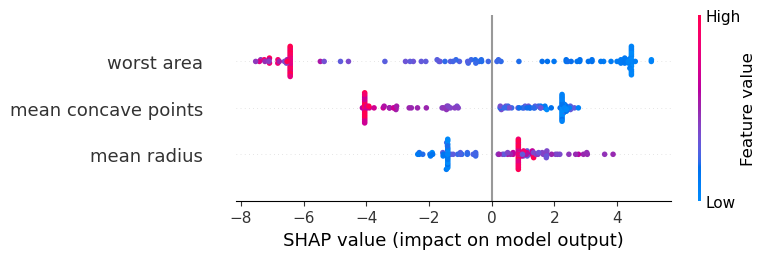

In [133]:
shap.summary_plot(shap_values, X_test_top)

interpretacion
Eje Y (variables):Las variables están ordenadas de arriba hacia abajo según su importancia promedio en las predicciones. La de arriba es la más influyente.
Eje X (valores SHAP):Cuánto impacta cada variable en la predicción.

Valores positivos → empujan la predicción hacia la clase positiva (por ejemplo, "maligno").
Valores negativos → empujan hacia la clase negativa (por ejemplo, "benigno").

Colores (valores originales de la variable):
Rojo → valor alto de la variable.
Azul → valor bajo de la variable.
Ayuda a ver cómo influye un valor alto o bajo en la predicción.